In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# https://www.kaggle.com/imdevskp/corona-virus-report
# https://python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves/
# https://stackoverflow.com/questions/26615019/python-proportion-test-similar-to-prop-test-in-r

In [2]:
# standard libs
import pandas as pd
import numpy as np
import plotly.express as px
import psycopg2
from scipy import stats
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# carlo b class
from DMexp3 import DM

In [4]:
colors = ["#3366cc","#dc3912","#ff9900","#109618","#990099","#0099c6","#dd4477","#66aa00","#b82e2e","#316395","#3366cc","#994499","#22aa99","#aaaa11","#6633cc","#e67300","#8b0707","#651067","#329262","#5574a6","#3b3eac","#b77322","#16d620","#b91383","#f4359e","#9c5935","#a9c413","#2a778d","#668d1c","#bea413","#0c5922","#743411"]

In [5]:
exp = 3
if exp == 3:
    ### EXP2
    my_data_view = "public.vw_exp3"
    vars_num = ["bmi"]
    vars_bin = [
        "outcome",
        "sex",
        "electsurg",
        "ventilat",
        "cdmi",
        "cnscva",
        "ascites",
        "hypermed",
        "renafail",
        "dialysis",
        "discancr",
        "wndinf",
        "steroid",
        "wtloss",
        "bleeddis",
        "transfus",
        "supinfec",
        "wndinfd",
        "orgspcssi",
        "dehis",
        "oupneumo",
        "reintub",
        "pulembol",
        "renainsf",
        "oprenafl",
        "urninfec",
        "cdarrest",
        "othbleed",
        "othdvt",
        "othsysep",
        "othseshock",
        "othcdiff",
        "mortality",
    ]
    vars_cat = [
        "race_new",
        "diabetes",
        "surgspec",
        "dyspnea",
        "prsepis",
        "asaclas",
        "wound_closure",
    ]
  
if exp == 2:
    ### EXP2
    my_data_view = "public.vw_exp2"
    vars_num = ["bmi", "pro_numnodes", "pro_clear_radial"]
    vars_bin = [
        "outcome",
        "sex",
        "smoke",
        "cdmi",
        "hxchf",
        "cnscva",
        "hxcopd",
        "ascites",
        "discancr",
        "steroid",
        "wtloss",
        "bleeddis",
        "supinfec",
        "wndinfd",
        "orgspcssi",
        "dehis",
        "oupneumo",
        "reintub",
        "pulembol",
        "failwean",
        "renainsf",
        "oprenafl",
        "urninfec",
        "cnscva",
        "cdarrest",
        "othbleed",
        "othdvt",
        "othcdiff",
        "othsysep",
        "othseshock",
        "mortality",
    ]
    vars_cat = [
        "race_new",
        "diabetes",
        "pro_prestage_t",
        "pro_prestage_t_grouped",
        "pro_prelymph_n",
        "pro_prelymph_n_grouped",
        "pro_predistantm_m",
        "pro_predistantm_m_grouped",
        "pro_tumorloc",
        "pro_chemo",
        "pro_chemo_grouped",
        "asaclas",
        "pro_approach",
        "pro_approach_grouped",
        "pro_pathstage_t",
        "pro_pathstage_t_grouped",
        "pro_pathlymph_n",
        "pro_pathlymph_n_grouped",
        "pro_pathdistantm_m",
        "pro_pathdistantm_m_grouped",
        "pro_marg_radial",
        "pro_anastomic",
    ]

if exp == 1:    
    ### EXP1
    my_data_view = "public.vw_exp1"
    vars_num = ["length_of_stay", "bmi", "age", "operative_time"]
    vars_bin = [
        "outcome",
        "lap_converted_to_open",
        "anastomotic_leak",
        "bleeding_b",
        "surgical_site_infection",
        "deep_organ_space_infection",
        "dopertod",
        "reoperation1",
        "readmission1",
        "septic_shock",
        "myocardial_infarction",
        "acute_renal_failure",
        "pneumonia",
        "deep_vein_thrombosis",
        "pulmonary_embolism",
        "sex_male",
        "smoke",
        "hypertension",
        "stroke",
        "steroid",
        "wtloss",
        "bleeddis",
        "hxchf",
        "hxcopd",
    ]
    vars_cat = [
        "race_new",
        "diabetes",
        "asaclas",
        "pathologic_t_stage",
        "pathologic_n_stage",
    ]

In [6]:
num_cnt = len(vars_num)
bin_cnt = len(vars_bin)
cat_cnt = len(vars_cat)

In [7]:
template = """
<!doctype html>
<html lang="en">
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.0/css/bootstrap.min.css" integrity="sha384-9aIt2nRpC12Uk9gS9baDl411NQApFmC26EwAOH8WgZl5MYYxFfc+NcPb1dKGj7Sk" crossorigin="anonymous">

    <title>Stats</title>
    <style>
      table.cstats td:nth-child(3), table.cstats td:nth-child(4) {
        background: LightSteelBlue;
        text-align: right;
      }
      table.cstats td:nth-child(5), table.cstats td:nth-child(6) {
        background: Cornsilk;
        text-align: right;
      } 
      #sum-table td:nth-child(n+2) {
        text-align: right;
      }
      hr {
        padding-bottom: 30px;
      }
    </style>
    <!-- Load plotly.js into the DOM -->
    <script src='https://cdn.plot.ly/plotly-latest.min.js'></script>
    <script src="https://code.jquery.com/jquery-3.5.1.min.js" integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" crossorigin="anonymous"></script>
  </head>
  <body>
    <div class="container">
    <h1 id="my-var-0">Variable Analysis</h1>
"""
f = open("D:/__DM__/outfile.html", "w")
f.write(template)
f.close()
#str(datetime.datetime.now())

In [8]:
### EXPOSURE/TREATMENT CNT
q = """
select intervention, count(*) 
from my_data_view group by intervention
order by 1 desc
"""
q = q.replace('my_data_view', my_data_view)
top = DM.fetch_df(q)
treat_yes = top.query('intervention=="Yes"').iloc[0]
treat_no = top.query('intervention=="No"').iloc[0]

In [9]:
DM.fn_out_add_html(str("go " + str(datetime.datetime.now())) + "<br>")
stbl = """
<div id="divData">
<button id="buttonExport" class="btn btn-success" disabled>export</button>
<table id="sum-table" class="table table-sm table-bordered">
  <thead>
    <tr style="background: SteelBlue; color: WhiteSmoke;">
      <th>Variable</th>
      <th>Treatment YES<br><b>n=treat_yes</b></th>
      <th>Treatment NO<br><b>n=treat_no</b></th>
      <th>p-value</th>
      <th>Missing values</th>
    </tr>
  </thead>
  <tbody>
  </tbody>
</table>
</div>
"""
stbl = stbl.replace('treat_yes', str(treat_yes["count"])).replace('treat_no', str(treat_no["count"]))
DM.fn_out_add_html(stbl)
#main variable counter
i = 1

In [10]:
htm = '<p class="alert alert-success" style="font-size:xx-large;">Numeric Variable Analysis</p>'
display(HTML(htm))
DM.fn_out_add_html(htm)

P-Value:3.977792861632596e-12 T-Statistic:-6.965129751531063


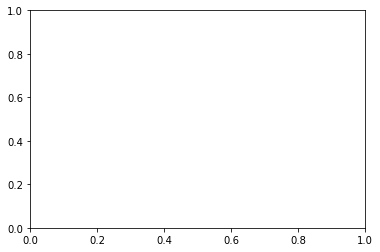

In [11]:
for var in vars_num:
    # print(var)
    hd = DM.fn_var_header(var, i)  
    display(HTML(hd))
    DM.fn_out(hd)    
    #stdev
    dfs = DM.db_num_var_stdev(var, my_data_view)
    DM.fn_out_tbl_num(dfs, i)
    # fetch db data
    df = DM.db_num_var(var, my_data_view)
    df["my_var"] = pd.to_numeric(df["my_var"])
    a = df.query("intervention=='Yes'").my_var.to_list()
    b = df.query("intervention=='No'").my_var.to_list()
    sns.kdeplot(a, shade=True)
    sns.kdeplot(b, shade=True)
    plt.title("Independent Sample T-Test " + var)
    plt.savefig("D:/__DM__/img_" + var + ".png") 
    
    DM.fn_out_add_html('<div><img src="img_' + var + '.png" alt="..." class="img-thumbnail"></div>')
    plt.close()
    plt.clf()
    plt.cla()
    tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
    print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic  
    # DM.fn_out_add_html("P-Value: {0} T-Statistic: {1}".format(pValue, tStat, 8))
    DM.fn_out_add_html('P-value: <span id="pvalue' + str(i) + '">' + str(pValue) + '</span>')
    DM.fn_out_add_html(' T-Statistic: <span id="tstat' + str(i) + '">' + str(tStat) + '</span>')
    DM.fn_out_add_html("<hr>")
    i = i + 1
    

In [12]:
htm = '<p class="alert alert-danger" style="font-size:xx-large;">Binary Variable Analysis</p>'
display(HTML(htm))
DM.fn_out_add_html(htm)

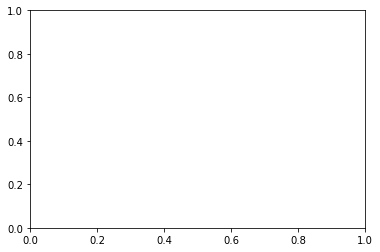

In [13]:
### BINARY VARS
for var in vars_bin:
    hd = DM.fn_var_header(var, i)   
    # display(HTML(hd))
    DM.fn_out_add_html(hd)
    #variable info
    var_desc = DM.db_var_desc(var)
    num_rows = len(var_desc.index)
    if num_rows > 0:
        DM.fn_out_tbl_simple(var_desc)
    #analyze var
    dfv = DM.pull_db(var, my_data_view)
    dfv = dfv.replace({None: 'nulls'})
    #data frame to html table
    html = dfv.to_html()
    DM.fn_out_tbl(html, i)   
    # heatmap   
    a4_dims = (8,8)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.heatmap(ax=ax, data=DM.perc_heat(dfv), annot=True, cmap="YlGnBu", square=True, linewidths=1, annot_kws={'size':16}, vmin=0, vmax=100, fmt=".2f")
    fig.savefig("D:/__DM__/img/img_heat_" + str(i) + ".png") 
    plt.close()
    plt.clf()
    plt.cla()    
    # heatmap end
    col1 = dfv.columns[0]
    x = dfv.query("{0} not in ('nulls', 'NA')".format(col1))[["catA", "catB"]] #kill ouright NULL values from the matrix 
    arr = x.to_numpy()
    k1,k2,k3,k4 = stats.chi2_contingency(arr)
    DM.fn_out_add_html('P-value: <span id="pvalue' + str(i) + '">' + str(k2) + '</span>')
    DM.fn_out_add_html("<hr>") 
    i = i + 1


In [14]:
htm = '<p class="alert alert-info" style="font-size:xx-large;">Categorical Variable Analysis</p>'
display(HTML(htm))
DM.fn_out_add_html(htm)

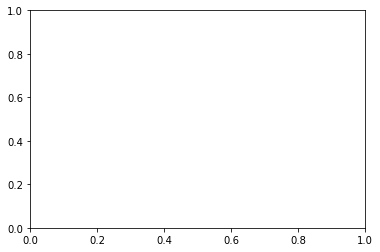

In [15]:
### CATEGORICAL VARS 
for var in vars_cat:
    hd = DM.fn_var_header(var, i)    
    # display(HTML(hd))
    DM.fn_out_add_html(hd)
    #variable info
    var_desc = DM.db_var_desc(var)
    num_rows = len(var_desc.index)
    if num_rows > 0:
        DM.fn_out_tbl_simple(var_desc)
    #analyze var
    dfv = DM.pull_db(var, my_data_view)
    dfv = dfv.replace({None: 'nulls'})
    #data frame to html table
    html = dfv.to_html()
    DM.fn_out_tbl(html, i) 
    # heatmap
    a4_dims = (8,8)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.heatmap(ax=ax, data=DM.perc_heat(dfv), annot=True, cmap="YlGnBu", square=True, linewidths=1, annot_kws={'size':16}, vmin=0, vmax=100, fmt=".2f")
    fig.savefig("D:/__DM__/img/img_heat_" + str(i) + ".png") 
    plt.close()
    plt.clf()
    plt.cla()    
    # heatmap end    
    col1 = dfv.columns[0]
    x = dfv.query("{0} not in ('nulls', 'NA')".format(col1))[["catA", "catB"]] #kill ouright NULL values from the matrix 
    arr = x.to_numpy()
    k1,k2,k3,k4 = stats.chi2_contingency(arr)
    DM.fn_out_add_html('P-value: <span id="pvalue' + str(i) + '">' + str(k2) + '</span>')
    DM.fn_out_add_html("<hr>") 
    i = i + 1

In [16]:
DM.fn_out("stop " + str(datetime.datetime.now()) + "<br>")

In [17]:
# produce summary table using javascript
scr = """
    <script>
      //30-33 numeric vars
      var row1 = '<tr><td colspan="5"><h3>Numeric Variables</h3></td></tr>';
      $("#sum-table tbody").append(row1);      
      for (i = 1; i <= num_cnt; i++) {
        elem = "table" + i;
        n = '';
        var title = $("#" + elem + " tr:nth-child(1) td:nth-child(6)").text();
        //var row1 = '<tr><td colspan="5"><b>' + title + '</b></td></tr>';
        //$("#sum-table tbody").append(row1);

        var t2 = $("#" + elem + " tr:nth-child(1) td:nth-child(4)").text();
        var p2 = $("#" + elem + " tr:nth-child(1) td:nth-child(5)").text();
        var t3 = $("#" + elem + " tr:nth-child(2) td:nth-child(4)").text();
        var p3 = $("#" + elem + " tr:nth-child(2) td:nth-child(5)").text();
        var pv = $("#pvalue" + i).text()
        var missing = parseInt($("#" + elem + " tr:nth-child(1) td:nth-child(7)").text()) + 
                      parseInt($("#" + elem + " tr:nth-child(2) td:nth-child(7)").text());
          var row2 = '<tr><td><span class="badge badge-primary">' + title + '</span></td><td>' + t2 + ' (+/-' + p2 + ')' + '</td>' +
            '<td>' + t3 + ' (+/-' + p3 + ')' + '</td><td>' + pv + '</td><td>' + missing + '</td></tr>';
          $("#sum-table tbody").append(row2);

      }  
      
      
      // binary variables
      for (i = num_cnt + 1; i <= num_cnt + bin_cnt; i++) {
        var n = '';
        elem = "table" + i;
        var tableRow = $("#" + elem + " td").filter(function () {
          return $(this).text() == "NA";
        }).closest("tr");
        if (tableRow[0] !== undefined) {
          var n2 = $(tableRow[0]).find("td:eq(1)").text();
          var n3 = $(tableRow[0]).find("td:eq(2)").text();
          n = parseInt(n2) + parseInt(n3)
          // console.log(n);
        }
        var title = $("#" + elem + " th:nth-child(2)").text();
        var t2 = $("#" + elem + " tr:nth-child(1) td:nth-child(3)").text();
        var p2 = $("#" + elem + " tr:nth-child(1) td:nth-child(5)").text();
        var t3 = $("#" + elem + " tr:nth-child(1) td:nth-child(4)").text();
        var p3 = $("#" + elem + " tr:nth-child(1) td:nth-child(6)").text();
        var pv = $("#pvalue" + i).text();
        var value = $("#" + elem + " tr:nth-child(1) td:nth-child(2)").text();
        var row2 = '<tr><td><span class="badge badge-secondary">' + title + '</span> (' + value + ')</td><td>' + t2 + ' (' + p2 + ')' + '</td>' +
          '<td>' + t3 + ' (' + p3 + ')' + '</td><td>' + pv + '</td><td>' + n + '</td></tr>';
        if (i == num_cnt + 1) {
          var row1 = '<tr><td colspan="5"><h3>Binary Variables</h3></td></tr>';
          $("#sum-table tbody").append(row1);
        }
        $("#sum-table tbody").append(row2);
      };
      
      
      //last categorical vars
      var row1 = '<tr><td colspan="5"><h3>Categorical Variables</h3></td></tr>';
      $("#sum-table tbody").append(row1);
      for (i = num_cnt + bin_cnt + 1; i <= num_cnt + bin_cnt + cat_cnt; i++) {
        var pv = $("#pvalue" + i).text()
        var title = $("#table" + i + " th:nth-child(2)").text();
        var row1 = '<tr><td colspan="3"><span class="badge badge-info">' + title + '</span></td><td>' + pv + '</td><td></td></tr>';
        $("#sum-table tbody").append(row1);
        $("#table" + i + " > tbody  > tr").each(function (index, tr) {
          //console.log(index);
          title = $(tr).find("td:eq(0)").text();
          t2 = $(tr).find("td:eq(1)").text();
          p2 = $(tr).find("td:eq(3)").text();
          t3 = $(tr).find("td:eq(2)").text();
          p3 = $(tr).find("td:eq(4)").text();
          var row2 = '<tr><td>' + title + '</td><td>' + t2 + ' (' + p2 + ')' + '</td>' +
            '<td>' + t3 + ' (' + p3 + ')' + '</td><td>' + '</td><td>' + n + '</td></tr>';
          $("#sum-table tbody").append(row2);
        });
      }
    </script>
"""
scr = scr.replace('bin_cnt', str(bin_cnt))
scr = scr.replace('cat_cnt', str(cat_cnt))
scr = scr.replace('num_cnt', str(num_cnt))
DM.fn_out_add_html(scr)

In [18]:
### xls export javascript
xls = """
    <script>
      $(document).ready(() => {
        $("#buttonExport").prop('disabled', false);
        $("#buttonExport").click(e => {
          console.log('export');
          // Getting values of current time for generating the file name
          const dateTime = new Date();
          const day = dateTime.getDate();
          const month = dateTime.getMonth() + 1;
          const year = dateTime.getFullYear();
          const hour = dateTime.getHours();
          const minute = dateTime.getMinutes();
          const postfix = `${day}.${month}.${year}_${hour}.${minute}`;

          // Creating a temporary HTML link element (they support setting file names)
          const downloadElement = document.createElement('a');

          // Getting data from our `div` that contains the HTML table
          const dataType = 'data:application/vnd.ms-excel';
          const tableDiv = document.getElementById('divData');
          const tableHTML = tableDiv.outerHTML.replace(/ /g, '%20');

          // Setting the download source
          downloadElement.href = `${dataType},${tableHTML}`;

          // Setting the file name
          downloadElement.download = `exported_table_${postfix}.xls`;

          // Trigger the download
          downloadElement.click();

          // Just in case, prevent default behaviour
          e.preventDefault();
        });
      });
    </script>
<body>
</html>
"""
DM.fn_out_add_html(xls)

In [19]:
print(str(datetime.datetime.now()))

2020-08-08 21:10:08.619545
